In [23]:
import xarray as xr
import rasterio as rio
import rioxarray
import numpy
import matplotlib.pyplot as plt

In [24]:
veloc_fn = '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/mintpy_offsets/velocityRg.h5'
dem_fn = '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/merged/geom_reference/hgt.rdr.full'

In [43]:
ds = xr.open_dataset(veloc_fn)
dem_ds = gdal.Open(dem_fn, gdal.GA_ReadOnly)
dem = dem_ds.GetRasterBand(1).ReadAsArray()

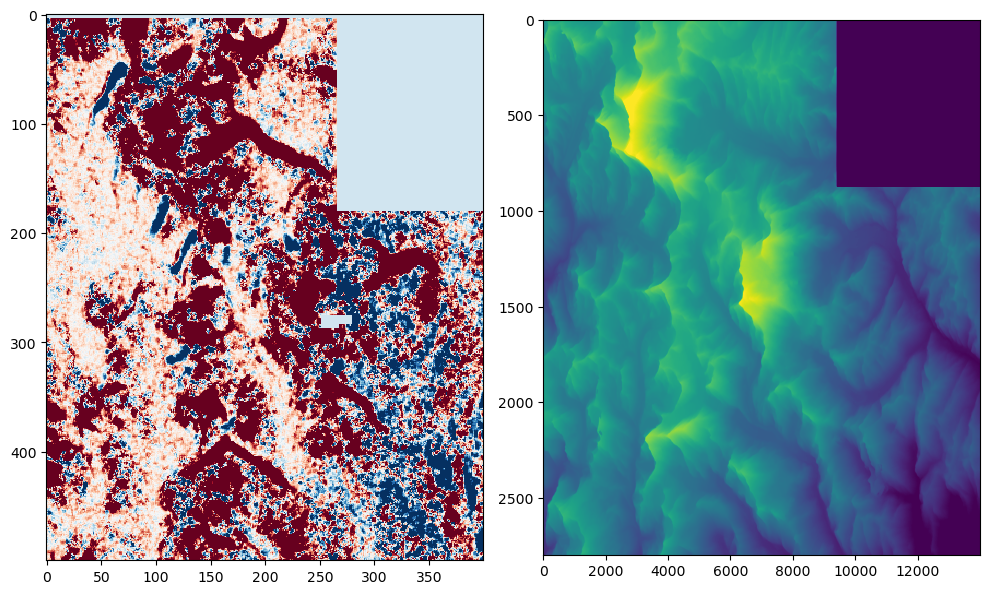

In [71]:
f, ax = plt.subplots(1, 2, figsize=(10, 10))
pos = ax[0].imshow(np.flip(ds.velocity, 0)[0:500, 400:800]-0.4, cmap = 'RdBu_r', vmin=-2, vmax=2, interpolation='none')

ax[1].imshow(np.flip(dem, (0))[0:2800, 12500:26500], vmin=3000, vmax=8000)
ax[1].set_aspect(6.13)

#f.colorbar(pos, ax=ax[0], shrink=0.4)

f.tight_layout()